# Frequency cloud words



## Loading the dataset
Before performing any analysis, it is important to follow a few preparatory steps to ensure the data is accurate and ready to use. Since we are working with books from different years and in different formats, some in PDF and others in TXT, we first need to import each book into Python and organize the content into a structured database.

In [24]:
import pandas as pd
data = pd.read_csv('Data/data.csv', sep=',')
data.head()

,Book,Published,Year,Content,num_caracteres
0,Thailand — a travel survival kit,Lonely Planet Publications,1982,﻿\na travel survival kit\nThailand — a travel ...,277855
1,Thailand — a travel survival kit,Lonely Planet Publications,1984,﻿■\n\ntravel survival kit\nGfl GtI (7TI Cnl\n□...,544582
2,Thailand — a travel survival kit,Lonely Planet Publications,1987,﻿it- -r-\nThailand\na travel survival kit\nTha...,733027
3,Thailand — a travel survival kit,Lonely Planet Publications,1990,"ISBN 0-86442-080-3 \n9 ""780 864""42 | Australia...",1291730
4,Thailand — a travel survival kit,Lonely Planet Publications,1992,i \ntravel surv \n—é ISBN 0-86442-170-2 \n8086...,1973926


## City mentions by year
First, we developed a frequency count of words per year for all the cities in Thailand to analyze the trends and identify if any particular city has gained traction over time. To create a clear visualization, we will exclude cities that have no mentions, zero counts, as they do not appear in the books, as well as those with fewer than 30 mentions.

In [30]:
import pandas as pd
df_books = data
df_cities = pd.read_csv("Data/Ciudades_Thailandia.csv")
results = []

#   Iteration in each row
for _, book in df_books.dropna(subset=["Content"]).iterrows():
    year = book["Year"]
    text = book["Content"].lower()  # Lower cases
    
    # Contar menciones por cada ciudad
    for _, city_row in df_cities.iterrows():
        city = city_row["city"].lower()
        count = text.count(city)
        
        results.append({
            "Year": year,
            "City": city_row["city"], 
            "Mentions": count
        })

# DataFrame with the frecuency per city per year
mentions_df = pd.DataFrame(results)
#  Pivot to see the info
pivot_df = mentions_df.pivot_table(index="City", columns="Year", values="Mentions", fill_value=0)
# Exclude those that have less than 30 mention 
pivot_df_30 = pivot_df[pivot_df.sum(axis=1) > 30]
# Exclude top Cities
cities_to_exclude = ['Bangkok', 'Chiang Mai','Phuket']
pivot_df_nt = pivot_df_30.loc[~pivot_df_30.index.isin(cities_to_exclude)]


### Heatmap for mentions of cities that have been mentioned more than 30 times over the years

/var/folders/r0/g3w5htjx4t50bz48pczjmx280000gn/T/ipykernel_26983/3925319030.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_df = pivot_df_30.applymap(compact_number)


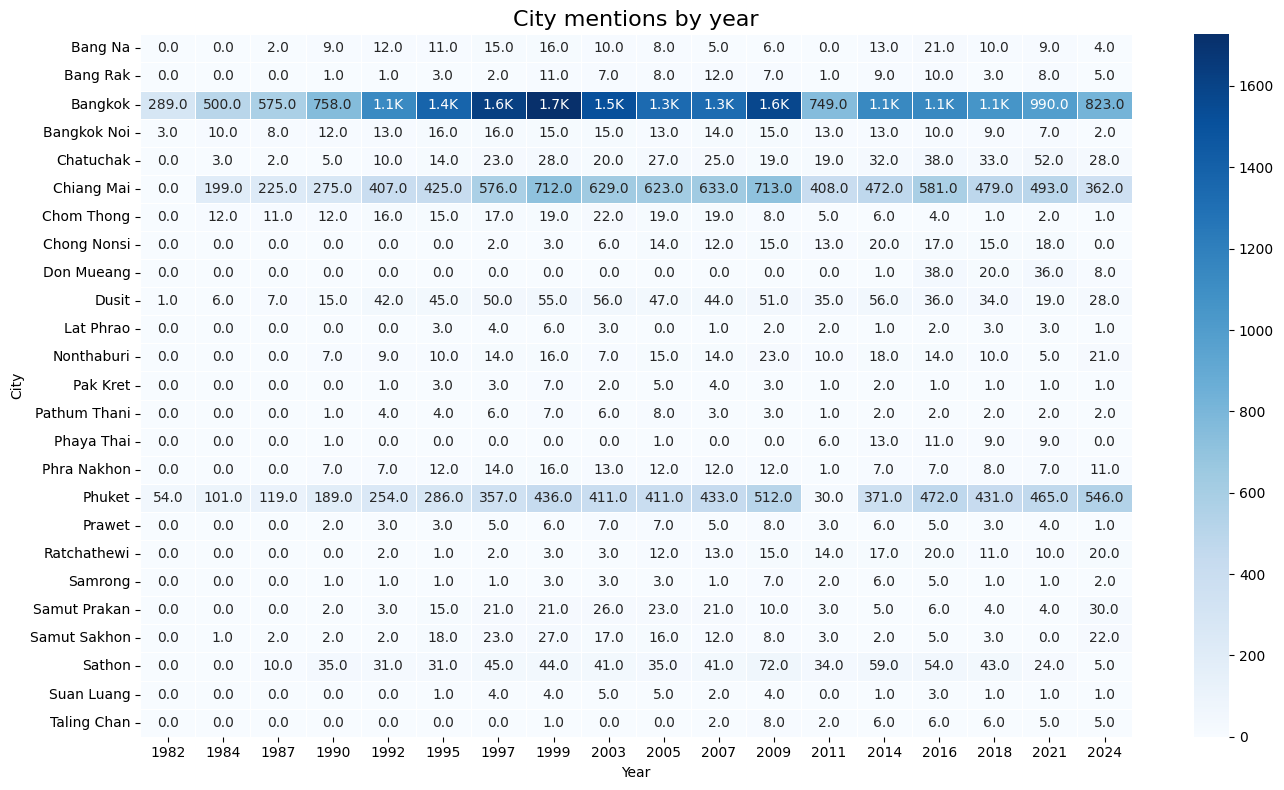

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def compact_number(num):
    if num >= 1_000_000:
        return f"{num/1_000_000:.1f}M"
    elif num >= 1_000:
        return f"{num/1_000:.1f}K"
    else:
        return str(num)

annot_df = pivot_df_30.applymap(compact_number)

plt.figure(figsize=(14, 8))

sns.heatmap(pivot_df_30, cmap="Blues", linewidths=0.5, annot=annot_df, fmt="")

plt.title("City mentions by year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("City")

plt.tight_layout()
plt.show()


### Heatmap for mentions of cities that have been mentioned more than 30 times over the years and exlciding top cities

/var/folders/r0/g3w5htjx4t50bz48pczjmx280000gn/T/ipykernel_26983/133634530.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_df = pivot_df_nt.applymap(compact_number)


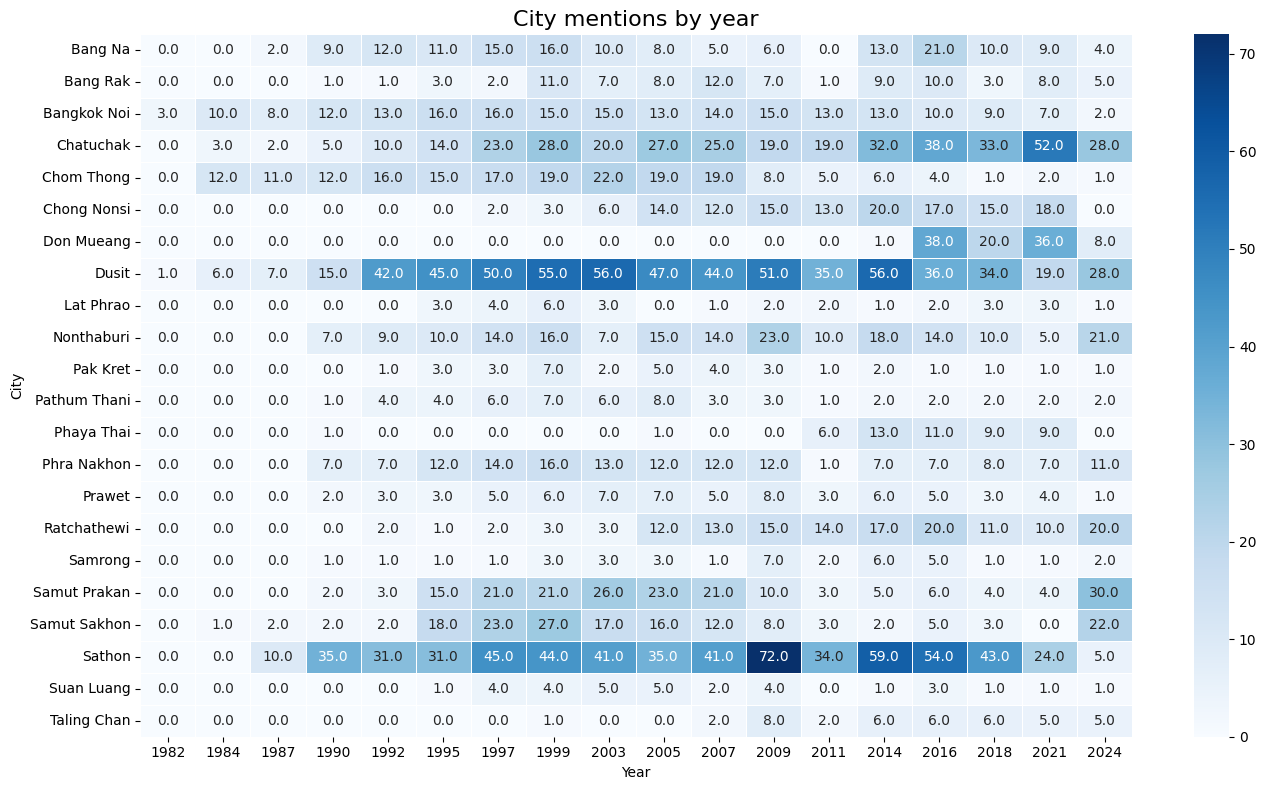

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def compact_number(num):
    if num >= 1_000_000:
        return f"{num/1_000_000:.1f}M"
    elif num >= 1_000:
        return f"{num/1_000:.1f}K"
    else:
        return str(num)

annot_df = pivot_df_nt.applymap(compact_number)

plt.figure(figsize=(14, 8))

sns.heatmap(pivot_df_nt, cmap="Blues", linewidths=0.5, annot=annot_df, fmt="")

plt.title("City mentions by year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("City")

plt.tight_layout()
plt.show()